In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Housing price in New York 

## Data preprocessing

In [116]:
data=pd.read_csv("AB_NYC_2019.csv")
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [51]:
data.shape

(48895, 16)

In [52]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [53]:
data.drop(['id','name','host_id','host_name','last_review'], axis=1, inplace=True)
data.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


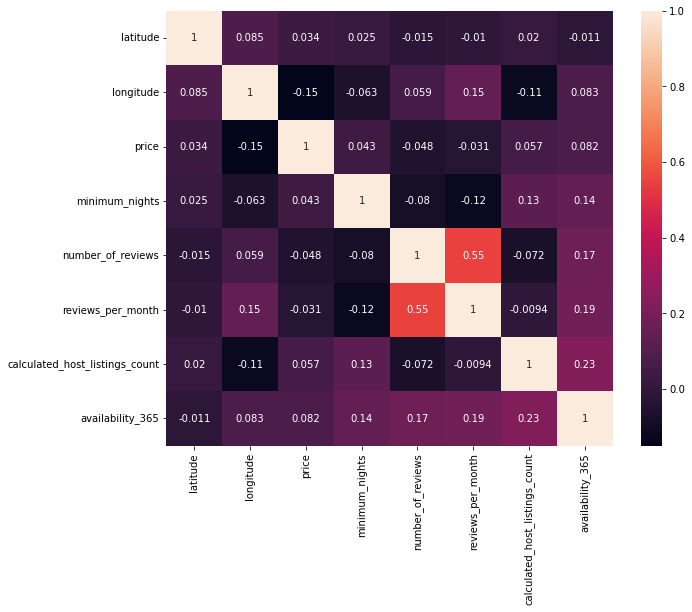

In [57]:
plt.figure(figsize=(10,8))
data.corr()
ax = sns.heatmap(data.corr(),annot=True)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


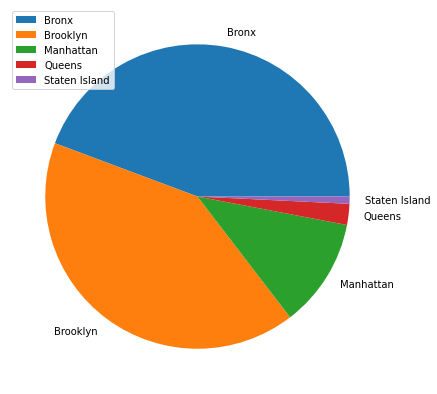

In [6]:
print(data['neighbourhood_group'].value_counts())
plt.figure(figsize=(7, 7))
plt.pie(data['neighbourhood_group'].value_counts(),labels=np.unique(data['neighbourhood_group']))
plt.legend(loc='upper left')

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


<BarContainer object of 5 artists>

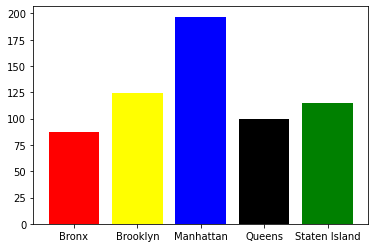

In [7]:
Neighbourhood=data['price'].groupby(data['neighbourhood_group'])
print(Neighbourhood.mean())
plt.bar(np.unique(data['neighbourhood_group']),Neighbourhood.mean(),color=["red","yellow",'blue','black','green'])

In [8]:
Neighbourhood2=data.groupby(['neighbourhood_group','room_type'])['price'].agg('mean')
Neighbourhood2

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

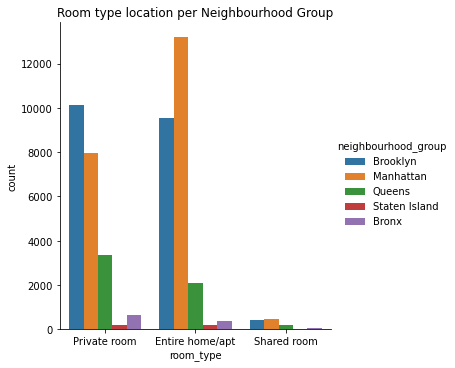

In [9]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=data);
plt.title(title)
plt.ioff()

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

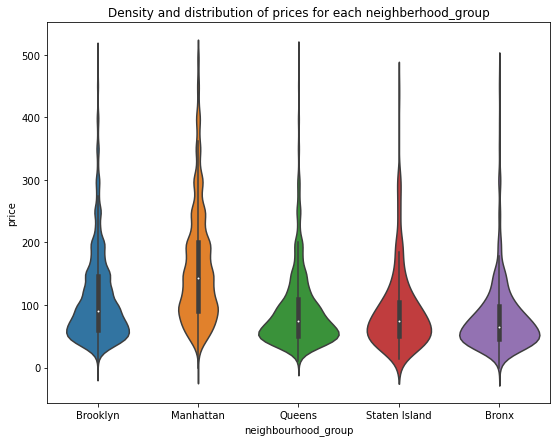

In [10]:
plt.figure(figsize=(9, 7))
sub=data[data.price <500]
viz_2=sns.violinplot(data=sub, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

No handles with labels found to put in legend.


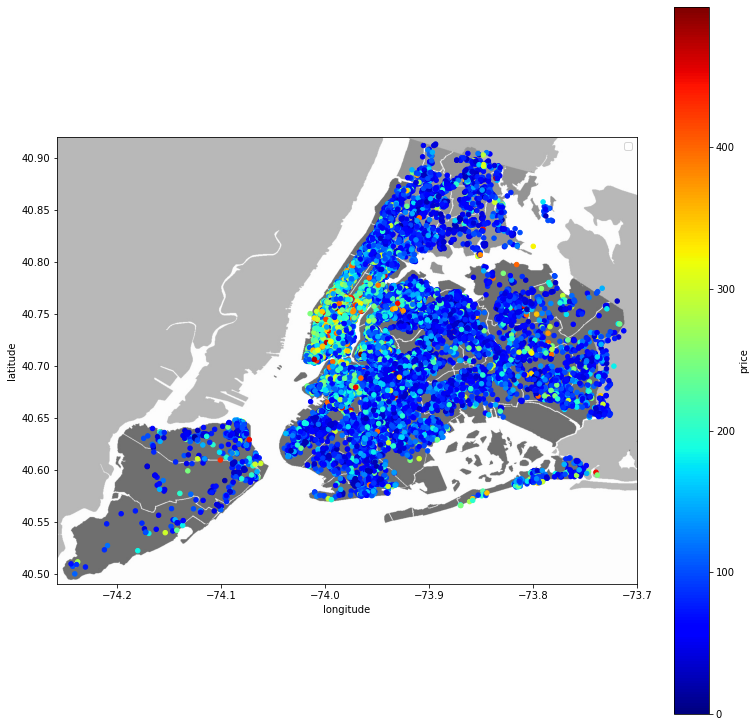

In [107]:
plt.figure(figsize=(13,13))
from PIL import Image
im = Image.open('New_York_City_.png')
plt.imshow(im,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sub.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
        cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, zorder=5)

plt.legend()
plt.show()

## Manhattan

C:\Users\Chuxu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


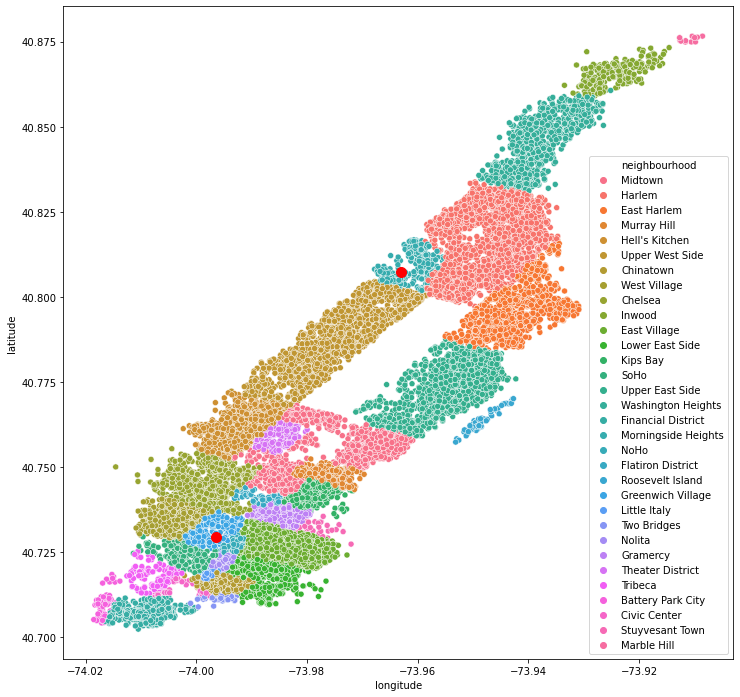

In [105]:
plt.figure(figsize=(12,12))
Manhattan=sub[sub['neighbourhood_group']=='Manhattan']
sns.scatterplot(Manhattan.longitude,Manhattan.latitude,hue=Manhattan.neighbourhood)
plt.scatter(-73.963036,40.807384,s=100,color='red')
plt.scatter(-73.9965,40.7295,s=100,color='red',label="NYU")

neighbourhood
Tribeca                490.638418
Battery Park City      367.557143
Flatiron District      341.925000
NoHo                   295.717949
SoHo                   287.103352
Midtown                282.719094
West Village           267.682292
Greenwich Village      263.405612
Chelsea                249.738544
Theater District       248.013889
Nolita                 230.138340
Financial District     225.490591
Gramercy               222.754438
Little Italy           222.066116
Murray Hill            220.958763
Upper West Side        210.918316
Hell's Kitchen         204.794178
Kips Bay               202.408511
Civic Center           191.942308
Upper East Side        188.948276
Lower East Side        186.312843
East Village           186.083108
Stuyvesant Town        169.108108
Chinatown              161.497283
East Harlem            133.198747
Two Bridges            127.069444
Harlem                 118.974041
Morningside Heights    114.783237
Roosevelt Island       113.259740


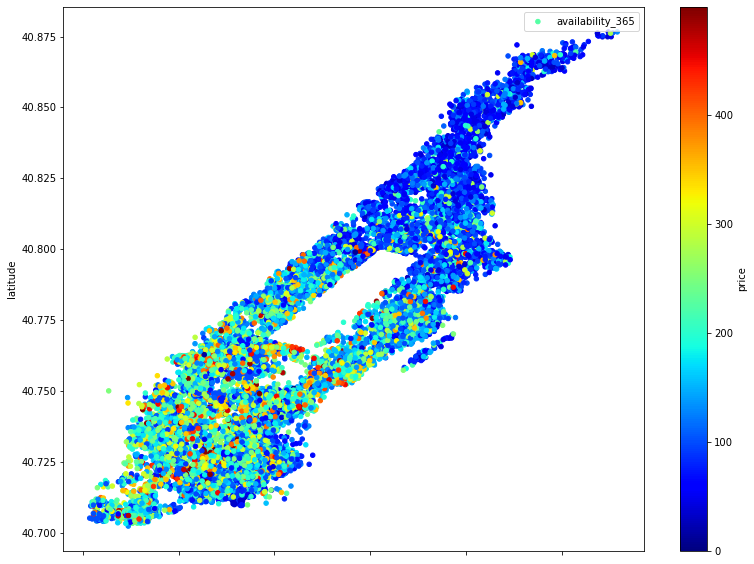

In [87]:
v4=Manhattan.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, figsize=(13,10))
v4.legend()
X=data[data['neighbourhood_group']=='Manhattan']['price'].groupby(data['neighbourhood'])
print((X.mean()).sort_values(ascending=False))

## House Near NYU

C:\Users\Chuxu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


neighbourhood
NoHo                 295.717949
SoHo                 287.103352
West Village         267.682292
Greenwich Village    263.405612
Nolita               230.138340
Gramercy             222.754438
Lower East Side      186.312843
East Village         186.083108
Name: price, dtype: float64
Average housing price near NYU 242.3997
Average housing price in NY 152.7207


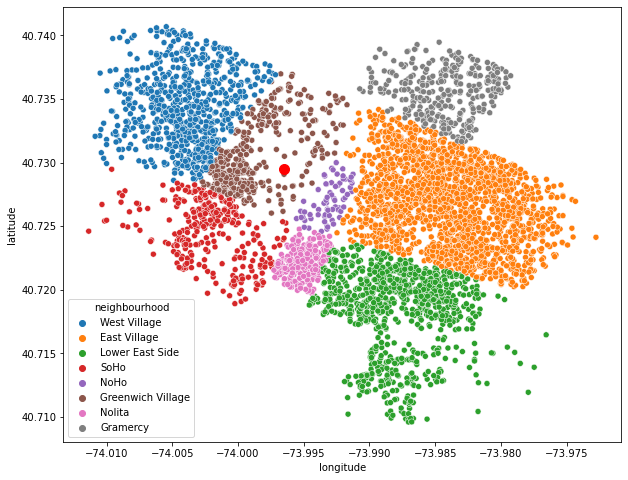

In [13]:
plt.figure(figsize=(10,8))
NYU_neighbourhood=data[(data['neighbourhood']=='NoHo')|(data['neighbourhood']=='SoHo')|(data['neighbourhood']=='Nolita')|(data['neighbourhood']=='West Village')|(data['neighbourhood']=='Greenwich Village')|(data['neighbourhood']=='Gramercy')|(data['neighbourhood']=='Lower East Side')|(data['neighbourhood']=='East Village')]
NYU_neighbourhood=NYU_neighbourhood[NYU_neighbourhood.price<500]
sns.scatterplot(NYU_neighbourhood.longitude,NYU_neighbourhood.latitude,hue=NYU_neighbourhood.neighbourhood)
plt.scatter(-73.9965,40.7295,s=100,color='red',label="NYU")
plt.ioff()
NYU=X.mean()[['NoHo','SoHo','Nolita','West Village','Greenwich Village','Gramercy','East Village','Lower East Side']].sort_values(ascending=False)
print(NYU)
print('Average housing price near NYU',round(np.mean(NYU),4))
print('Average housing price in NY',round(np.mean(data['price']),4))

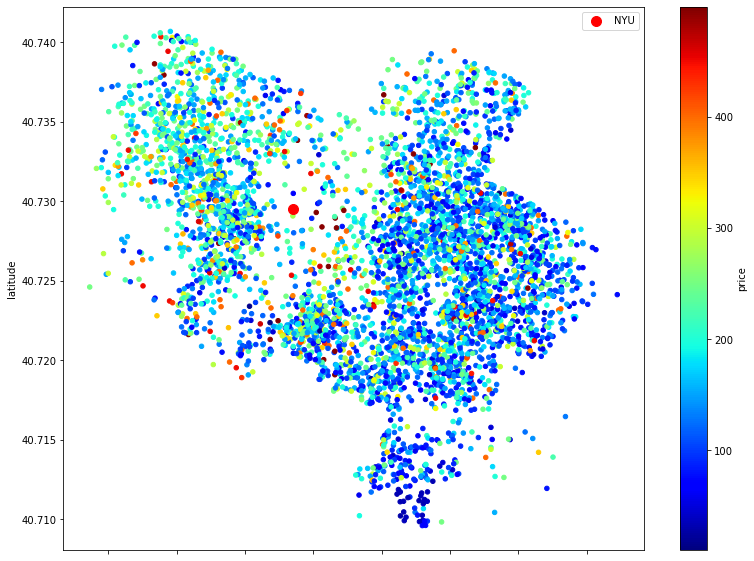

In [14]:
NYU_neighbourhood=data[(data['neighbourhood']=='NoHo')|(data['neighbourhood']=='SoHo')|(data['neighbourhood']=='Nolita')|(data['neighbourhood']=='West Village')|(data['neighbourhood']=='Greenwich Village')|(data['neighbourhood']=='Gramercy')|(data['neighbourhood']=='Lower East Side')|(data['neighbourhood']=='East Village')]
NYU_Neighbourhood=NYU_neighbourhood[NYU_neighbourhood.price<500]
v5=NYU_Neighbourhood.plot(kind='scatter', x='longitude', y='latitude', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, figsize=(13,10))
plt.scatter(-73.9965,40.7295,s=100,color='red', label='NYU')
v5.legend()

In [27]:
print('Average housing price near NYU: ',np.mean(NYU_neighbourhood.price))
print('Average housing price in NY',round(np.mean(data['price']),4))
NYU_neighbourhood['price'].groupby(data["neighbourhood"]).describe().round(2)

Average housing price near NYU:  218.69177943849726
Average housing price in NY 152.7207


,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
East Village,1853.0,186.08,198.71,10.0,100.00,150.0,200.00,3750.0
Gramercy,338.0,222.75,257.57,45.0,120.00,165.0,245.00,3000.0
Greenwich Village,392.0,263.41,434.84,43.0,139.00,197.5,250.00,6000.0
Lower East Side,911.0,186.31,478.66,29.0,90.00,139.0,200.00,9999.0
NoHo,78.0,295.72,218.20,75.0,179.25,250.0,350.00,1795.0
Nolita,253.0,230.14,371.63,20.0,109.00,179.0,250.00,5000.0
SoHo,358.0,287.10,305.66,10.0,125.00,199.0,341.25,3000.0
West Village,768.0,267.68,275.84,50.0,153.50,200.0,275.00,4000.0


In [29]:
NYU_neighbourhood['price'].groupby(data["room_type"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,3341.0,262.34,329.06,10.0,150.0,200.0,271.0,9999.0
Private room,1534.0,130.92,295.73,10.0,80.0,100.0,125.0,9999.0
Shared room,76.0,71.59,60.06,29.0,35.0,59.0,80.0,350.0


 ## House near Columbia University

C:\Users\Chuxu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


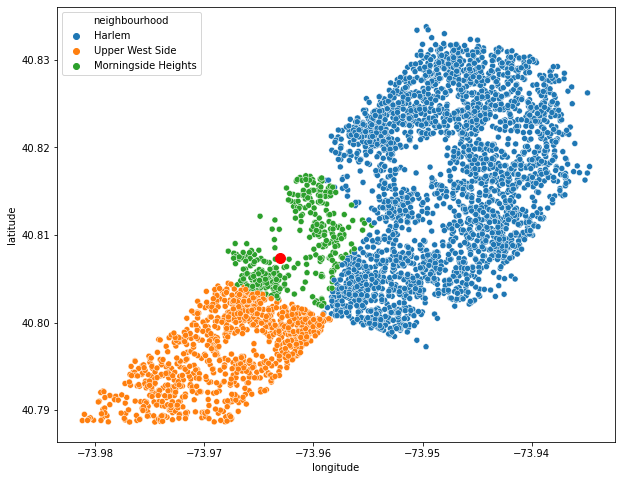

In [16]:
plt.figure(figsize=(10,8))
Ucolumbia_neighbourhood=data[(data['neighbourhood']=='Morningside Heights')|(data['neighbourhood']=='Harlem')|(data['neighbourhood']=='Upper West Side')]
Ucolumbia_neighbourhood=Ucolumbia_neighbourhood[Ucolumbia_neighbourhood.latitude>40.7886]
sns.scatterplot(Ucolumbia_neighbourhood.longitude,Ucolumbia_neighbourhood.latitude,hue=Ucolumbia_neighbourhood.neighbourhood)
plt.scatter(-73.963036,40.807384,s=100,color='red')

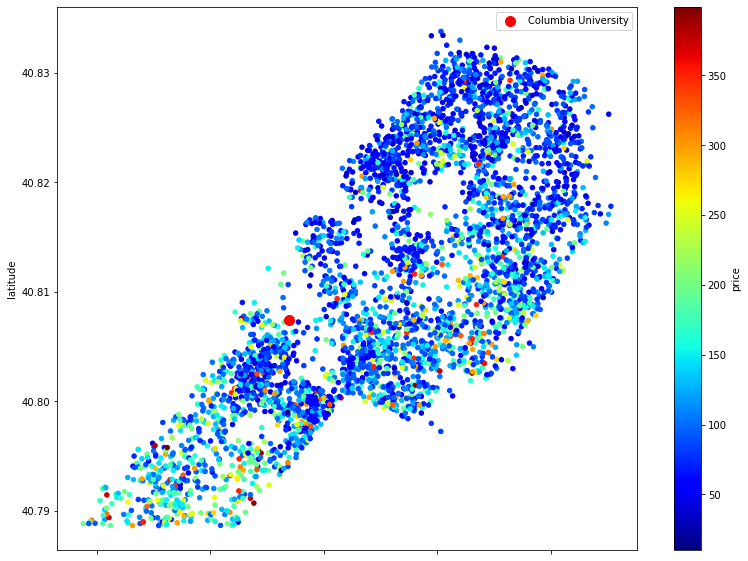

In [17]:
Ucolumbia_Neighbourhood=Ucolumbia_neighbourhood[Ucolumbia_neighbourhood.price<400]
v6=Ucolumbia_Neighbourhood.plot(kind='scatter', x='longitude', y='latitude', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, figsize=(13,10))
plt.scatter(-73.963036,40.807384,s=100,color='red',label='Columbia University')
v6.legend()

In [23]:
print('Average housing price near Columbia University: ',np.mean(Ucolumbia_neighbourhood.price))
print('Average housing price in NY',round(np.mean(data['price']),4))
Ucolumbia_neighbourhood['price'].groupby(data["neighbourhood"]).describe().round(2)

Average housing price near Columbia University:  131.68079237713138
Average housing price in NY 152.7207


,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Harlem,2658.0,118.97,155.99,10.0,65.0,89.0,134.75,5000.0
Morningside Heights,346.0,114.78,89.59,30.0,70.0,98.5,138.00,1200.0
Upper West Side,984.0,171.95,243.00,11.0,80.0,120.0,185.00,4000.0


In [26]:
Ucolumbia_neighbourhood['price'].groupby(data["room_type"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,1696.0,192.51,234.54,11.0,110.0,150.0,200.0,5000.0
Private room,2220.0,87.20,102.39,16.0,58.0,70.0,95.0,3000.0
Shared room,72.0,70.31,46.76,10.0,45.0,60.0,80.0,300.0
